In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train_df=pd.read_csv("sign_mnist_train.csv")
test_df=pd.read_csv("sign_mnist_test.csv")

In [3]:
test=pd.read_csv("sign_mnist_test.csv")
y=test['label']

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


C:\Programming\anaconda3\envs\python-cvcourse\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


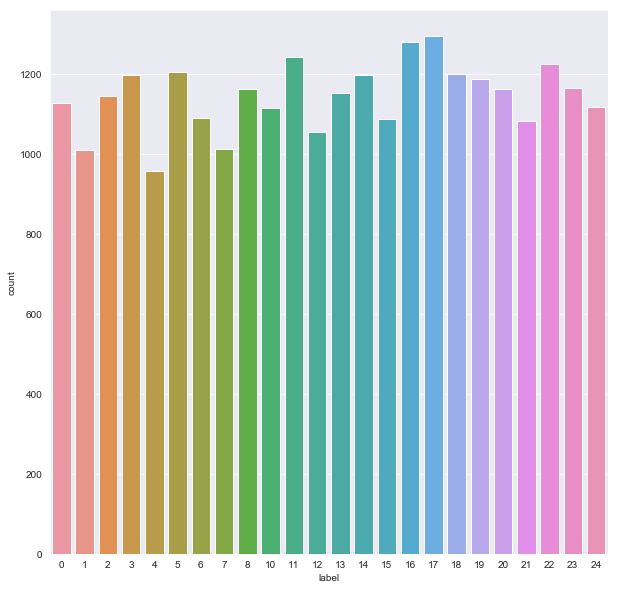

In [5]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [6]:
y_train=train_df['label']
y_test=test_df['label']
del train_df['label']
del test_df['label']

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
y_train=label_binarizer.fit_transform(y_train)
y_test=label_binarizer.fit_transform(y_test)

In [8]:
x_train=train_df.values
x_test=test_df.values

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

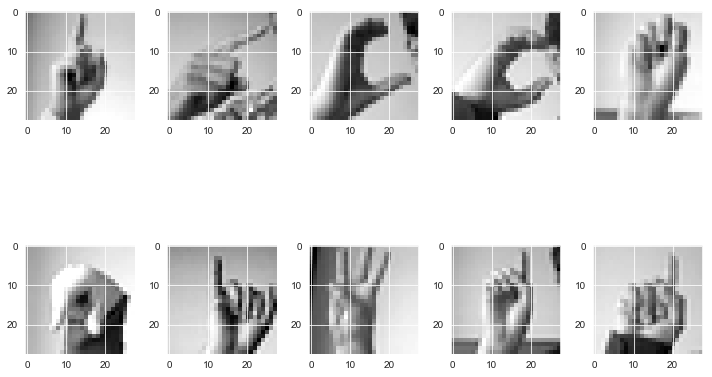

In [11]:
f,ax=plt.subplots(2,5) 
f.set_size_inches(10,10)
k=0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28),cmap="gray")
        k+=1
    plt.tight_layout()  

In [12]:
datagen=ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [13]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [14]:
model=Sequential()
model.add(Conv2D(75,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(25,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
__________

In [15]:
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 89s 414ms/step - loss: 1.0023 - acc: 0.6824 - val_loss: 0.3261 - val_acc: 0.8958
Epoch 2/20


C:\Programming\anaconda3\envs\python-cvcourse\lib\site-packages\keras\callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


215/215 [==============================] - 87s 404ms/step - loss: 0.2091 - acc: 0.9311 - val_loss: 0.3140 - val_acc: 0.8897
Epoch 3/20
215/215 [==============================] - 88s 407ms/step - loss: 0.1009 - acc: 0.9673 - val_loss: 0.6384 - val_acc: 0.7998
Epoch 4/20
215/215 [==============================] - 89s 412ms/step - loss: 0.0642 - acc: 0.9793 - val_loss: 0.0781 - val_acc: 0.9760
Epoch 5/20
215/215 [==============================] - 89s 412ms/step - loss: 0.0455 - acc: 0.9852 - val_loss: 0.0545 - val_acc: 0.9840
Epoch 6/20
215/215 [==============================] - 89s 413ms/step - loss: 0.0398 - acc: 0.9879 - val_loss: 0.0389 - val_acc: 0.9870
Epoch 7/20
215/215 [==============================] - 87s 406ms/step - loss: 0.0297 - acc: 0.9907 - val_loss: 0.0146 - val_acc: 0.9968
Epoch 8/20
215/215 [==============================] - 88s 408ms/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.0543 - val_acc: 0.9824
Epoch 9/20
215/215 [==============================] - 87s 405ms/st

In [16]:
print("Accuracy of the model is - ",model.evaluate(x_test,y_test)[1]*100,"%")

7172/7172 [==============================] - 8s 1ms/step
Accuracy of the model is -  99.79085331846068 %


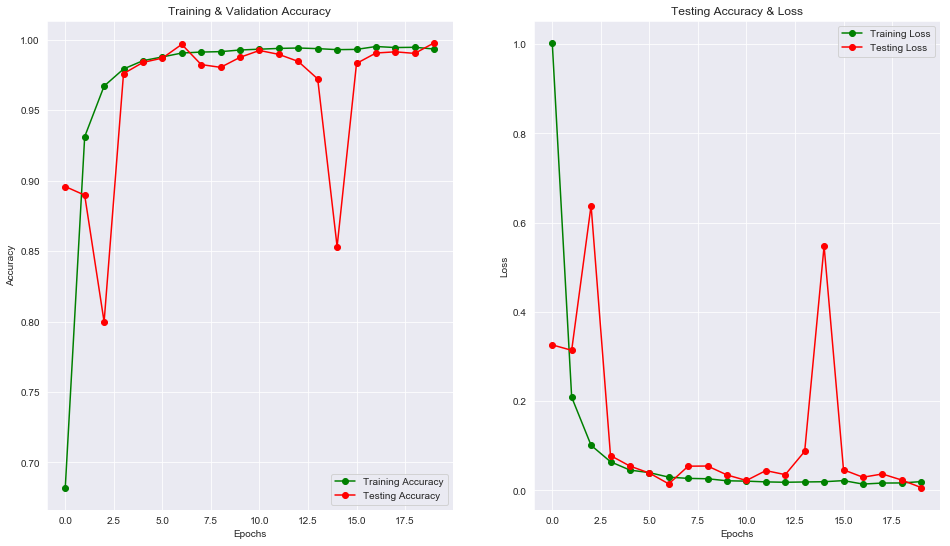

In [18]:
epochs=[i for i in range(20)]
fig,ax=plt.subplots(1,2)
train_acc=history.history['acc']
train_loss=history.history['loss']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs,train_acc,'go-',label='Training Accuracy')
ax[0].plot(epochs,val_acc,'ro-' ,label='Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs,train_loss,'g-o',label='Training Loss')
ax[1].plot(epochs,val_loss,'r-o',label='Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [19]:
predictions=model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i]>=9):
        predictions[i]+=1
predictions[:5]   

array([ 6,  5, 10,  0,  3], dtype=int64)

In [20]:
classes=["Class "+str(i) for i in range(25) if i!=9]
print(classification_report(y,predictions,target_names=classes))

             precision    recall  f1-score   support

    Class 0       1.00      1.00      1.00       331
    Class 1       1.00      1.00      1.00       432
    Class 2       1.00      1.00      1.00       310
    Class 3       1.00      0.95      0.97       245
    Class 4       0.99      1.00      1.00       498
    Class 5       1.00      1.00      1.00       247
    Class 6       1.00      1.00      1.00       348
    Class 7       1.00      1.00      1.00       436
    Class 8       1.00      1.00      1.00       288
   Class 10       1.00      1.00      1.00       331
   Class 11       1.00      1.00      1.00       209
   Class 12       1.00      0.99      1.00       394
   Class 13       1.00      1.00      1.00       291
   Class 14       1.00      1.00      1.00       246
   Class 15       1.00      1.00      1.00       347
   Class 16       1.00      1.00      1.00       164
   Class 17       0.92      1.00      0.96       144
   Class 18       1.00      1.00      1.00   

In [21]:
cm=confusion_matrix(y,predictions)

In [22]:
cm=pd.DataFrame(cm,index=[i for i in range(25) if i!=9],columns=[i for i in range(25) if i!=9])

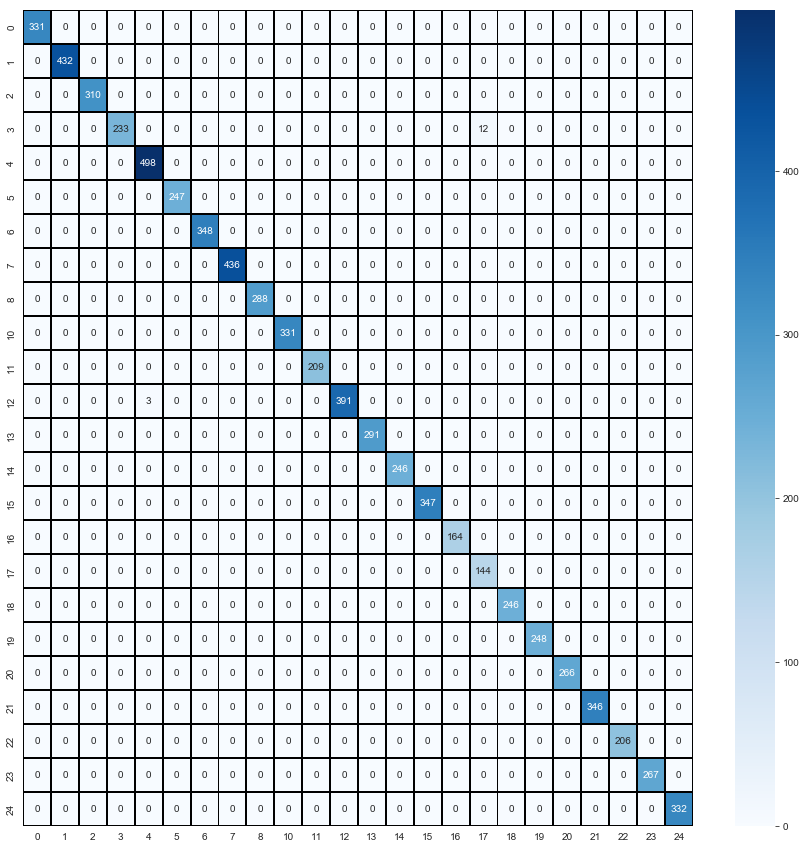

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,cmap="Blues",linecolor='black',linewidth=1,annot=True,fmt='')

In [26]:
model.save('dsa1.h5')